In [34]:
import time
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex
from sklearn import preprocessing as sklpp
from sklearn import decomposition as skldecomp
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import nltk
from nltk.cluster.kmeans import KMeansClusterer

# Dataset 1- Sales Transaction Dataset- Weekly

## 1.a

The first dataset explored is a one that contains weekly purchased quantities of 800 over products over 52 weeks.

For this dataset, the K-means Clustering Algorithm and Gaussian Mixture Model will be utilized in order to determine the similarities of the products, and place them in their appropriate categories. The desired categories respectively being:
- Inexpensive Items
- Mid-Range Items
- Expensive Items

But, the number of categories will depend on the optimal K value for K-means Clustering, which will be explored later on.

In [2]:
## Importing the Dataset ##
weekly_trans_df = pd.read_csv("Dataset1/Sales_Transactions_Dataset_Weekly.csv")

weekly_trans = weekly_trans_df.loc[:,'W0':'W51']
weekly_trans.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,11,12,10,8,13,12,14,21,6,14,...,4,7,8,10,12,3,7,6,5,10
1,7,6,3,2,7,1,6,3,3,3,...,2,4,5,1,1,4,5,1,6,0
2,7,11,8,9,10,8,7,13,12,6,...,6,14,5,5,7,8,14,8,8,7
3,12,8,13,5,9,6,9,13,13,11,...,9,10,3,4,6,8,14,8,7,8
4,8,5,13,11,6,7,9,14,9,9,...,7,11,7,12,6,6,5,11,8,9


## 1.b Pre Processing

In [3]:
## Checking for Missing Values ##
def check_missing_values(x):
    """Function to check if there are any missing values"""
    s = x.isnull().sum()
    m = s > 0
    if m.any():
            return "There is missing data"
    else:
        return 'There is no missing data'

check_missing_values(weekly_trans)

'There is no missing data'

With the function *check_missing_values()*, which takes only one parameter, I utilize it to check if there are any missing values. It does not have a function to fill the missing values, as the dataset does not have any missing values. In the case that this dataset had any missing values, the mode of the row would have been used in order to fill in those values. 

In [4]:
## Data Standardization ##

week_arr = weekly_trans.to_numpy() # convert to numpy array
                                   # makes handling data for pre-processing easier

week_arr = week_arr.T # transpose of the array 

mean_datascaler = sklpp.StandardScaler(with_mean=True, with_std=False)
centered_week = mean_datascaler.fit_transform(week_arr)

centered_week = centered_week.T



standard_week = pd.DataFrame(data=centered_week) # standardized dataset
standard_week

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,1.365385,2.365385,0.365385,-1.634615,3.365385,2.365385,4.365385,11.365385,-3.634615,4.365385,...,-5.634615,-2.634615,-1.634615,0.365385,2.365385,-6.634615,-2.634615,-3.634615,-4.634615,0.365385
1,3.019231,2.019231,-0.980769,-1.980769,3.019231,-2.980769,2.019231,-0.980769,-0.980769,-0.980769,...,-1.980769,0.019231,1.019231,-2.980769,-2.980769,0.019231,1.019231,-2.980769,2.019231,-3.980769
2,-1.692308,2.307692,-0.692308,0.307692,1.307692,-0.692308,-1.692308,4.307692,3.307692,-2.692308,...,-2.692308,5.307692,-3.692308,-3.692308,-1.692308,-0.692308,5.307692,-0.692308,-0.692308,-1.692308
3,3.730769,-0.269231,4.730769,-3.269231,0.730769,-2.269231,0.730769,4.730769,4.730769,2.730769,...,0.730769,1.730769,-5.269231,-4.269231,-2.269231,-0.269231,5.730769,-0.269231,-1.269231,-0.269231
4,-0.461538,-3.461538,4.538462,2.538462,-2.461538,-1.461538,0.538462,5.538462,0.538462,0.538462,...,-1.461538,2.538462,-1.461538,3.538462,-2.461538,-2.461538,-3.461538,2.538462,-0.461538,0.538462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,-0.442308,-0.442308,0.557692,-0.442308,-0.442308,1.557692,0.557692,-0.442308,-0.442308,0.557692,...,-0.442308,0.557692,0.557692,-0.442308,-0.442308,0.557692,-0.442308,-0.442308,1.557692,-0.442308
807,-2.730769,-1.730769,-2.730769,-2.730769,-1.730769,-0.730769,-0.730769,3.269231,-2.730769,-1.730769,...,0.269231,0.269231,1.269231,-0.730769,1.269231,2.269231,2.269231,2.269231,3.269231,2.269231
808,0.500000,-0.500000,-0.500000,-0.500000,0.500000,0.500000,1.500000,0.500000,0.500000,-0.500000,...,1.500000,-0.500000,-0.500000,1.500000,1.500000,-0.500000,-0.500000,-0.500000,3.500000,2.500000
809,-0.326923,-0.326923,-0.326923,0.673077,-0.326923,-0.326923,-0.326923,-0.326923,0.673077,-0.326923,...,-0.326923,-0.326923,-0.326923,0.673077,0.673077,-0.326923,-0.326923,-0.326923,1.673077,-0.326923


The data here was standardized in order to remove any anomalies that may be present in the dataset, as well as keeping the data consistent. There could be relatively small numbers for most of the products for most weeks, but then have large quantities another week, so I want to avoid any potential domination that can occur from those. 

## 1.c Feature Extraction

For this dataset, feature extraction is not necessary. There are only 52 features so there is not a need to reduce these number of features to capture some of the energy of the data, when I can capture 100% of the energy without issue. Only for the sake of comparison, I will utilize PCA for feature extraction and see how it fares against using the raw features.  

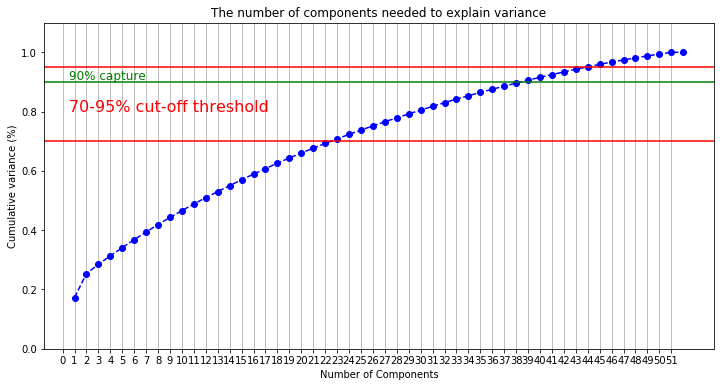

In [5]:
## Feature Reduction using PCA

# Figuring out the number of Principal Components to use
pca = PCA().fit(standard_week)
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 53, step=1)
y = np.cumsum(pca.explained_variance_ratio_) # Percentage of variance explained by each of the selected components.

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 52, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.axhline(y=0.70, color='r', linestyle='-')
plt.axhline(y=0.9, color='g', linestyle='-') # capture 90% of the energy 
plt.text(0.5, 0.8, '70-95% cut-off threshold', color = 'red', fontsize=16)
plt.text(0.5, 0.91, '90% capture', color = 'green', fontsize=12)

ax.grid(axis='x')
plt.show()

From the graph above, I utilized a method<sup>[]</sup> in order to find a good number of PCA components that could capture most of the energy and keep most of the data. <br>
Another method that could be used would be using the Singular Values of the dataset, but this provides a nicer visualization

In [6]:
pca_week = skldecomp.PCA(n_components=0.90, svd_solver='full') # Capturing 90% of the energy 
week_features = pca_week.fit_transform(standard_week)
print(week_features.shape)

(811, 39)


From the graph, we can see that if I want to capture 90% of the energy, it reduces to 39 features instead of 52 features

In [7]:
pca_week = pd.DataFrame(data=week_features) # PCA features dataset
pca_week

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,2.441996,-8.504334,3.141039,-4.971958,-0.592233,2.967627,-8.530201,-4.007543,2.824090,-4.510784,...,-3.228289,2.208608,-3.451493,-0.680816,0.084155,-5.566010,-0.671393,-1.480389,4.703715,2.699518
1,-3.208542,-5.450787,2.819494,-1.355798,-4.814036,3.463200,7.432356,1.276399,-4.883712,0.058954,...,0.295014,0.838039,-1.234253,-2.391243,-3.556752,-3.252129,-0.100280,-1.197021,-2.780427,0.789309
2,-2.286711,-3.481653,-2.611852,1.771072,4.522430,-3.038708,1.786280,-3.452773,3.181057,-2.869533,...,0.270764,-4.687341,-2.505280,1.710211,-4.910347,-0.508377,0.425501,2.202475,2.472728,-0.155285
3,-0.704663,-4.471753,-1.364465,-1.521005,1.547673,-0.656662,3.372839,6.678736,-2.364934,-2.622014,...,2.731167,-5.560794,-3.801750,2.721995,-7.021748,-0.464339,-9.867566,3.997169,1.760524,-3.713869
4,1.202850,2.622356,6.786641,1.144761,8.086804,0.006580,-4.302587,-4.277538,3.300533,3.450433,...,-1.688976,-2.591661,-1.181765,0.537647,5.192496,3.649681,-1.185151,1.784360,-5.843405,0.556277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,-4.071577,-4.401614,1.145462,-0.656546,-0.757003,1.371239,0.091375,0.738781,1.369946,0.043199,...,-0.813518,-0.041354,1.375345,0.039112,1.556138,-0.135523,-0.071009,0.074085,-0.720062,-1.261357
807,-12.235929,-3.582119,-1.786077,-0.612893,-1.042623,2.075012,1.361215,-1.078481,2.013265,-3.110766,...,1.389423,-2.200646,-2.139657,0.052136,0.427011,2.251367,-2.956712,0.969304,-2.003026,-3.771692
808,-6.209236,-2.816986,-0.161298,-1.136586,0.378315,-0.989912,1.227797,0.065047,-1.301026,-0.057874,...,-0.384586,1.225463,-0.328228,0.394908,0.521380,1.099136,-0.569010,-0.379328,1.143670,0.291242
809,-5.812272,-3.678543,-0.700147,0.294887,0.032424,-0.487032,0.770137,-0.345264,0.327897,0.879927,...,-0.590858,0.478861,-0.013418,0.354459,1.044823,-0.556808,0.242622,-0.459946,0.256568,-0.614305


## 1.d Processing the Datasets

As stated previously, the dataset will be processed using K-Means Algorith, and the Gaussian Mixture Model (EM) Clustering. I want to cluster the data based on the assumption of products that are similarly priced would have been bought the around the same amount of times per week. By this, I mean that cheap products would have a higher quantity bought per week, comparted to higher end products which would have smaller values. The way the data I assume to cluster would be:
- Inexpensive Items
- Mid-Range Items
- Expensive Items

Since I am working with an unsupervised dataset, I did not split the data up into training, validation or testing sets. There is not a simple way of evaluating any performance by using testing sets, and there are no hyperparameter that need tuning. The only hyperparameter around is K, that is acquired using the Within Cluster Sum of Squares (WCSS), also known as the elbow method. <br>

When it comes to K-Means Clustering:
<ol>
    <li>Randomly aassignment points to one of the K clusters</li>
    <li>Loop by computing the centroid of each cluster K for all *k* = 1,2,...,K</li>
    <center>$\mu $<sub>k</sub> = $\frac{1}{C_k}$ $\sum_{i:C_k}^{} x_i$</center>
    C<sub>k</sub> being the number of samples in K cluster
    <li>Go through each <strong>x</strong><sub>i</sub> and put it in Cluster C<sub>k</sub> if: </li>
    <center>$||x_i -\mu_k||_L$ $\ge ||x_i -\mu'_k||_L$ $\forall$ k $\neq$ k' </center>
</ol>

Normally, one uses K-Means Clustering with the Euclidean Distance metric, but seeing as I needed another method, I chose to use the Cosine Distance Metric as well in order to obtain the clusters. 

- Euclidean Distance Metric:
<center>d(p,q) = $\sqrt{\sum_{i=1}^{n} (q_i - p_i )^2}$ </center>

- Cosine Distance Metric:
<center>d(p,q) = 1- $\frac{pq}{||p|| ||q||}$ </center>



When it comes to the Gaussian Mixture Model, it is a generalization of K-Means Clustering. K-Means clusering effectively assumes a GMM with <br> <center>$\sum_{}^{} = \sigma^2$,  $\sigma^2 -> 0$</center>




Neither K-Means Cluster or GMM would work without a K value, so I start by using a method called the Within Cluster Sum of Squares (WCSS)<sup>[]</sup>, or the elbow method for short, to obtain an optimal number of clusters for the dataset. 

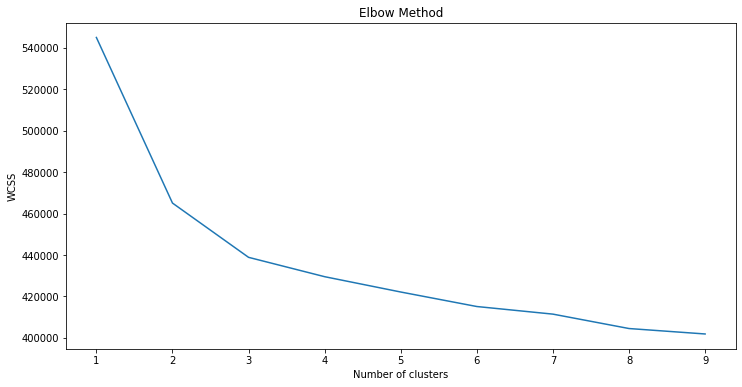

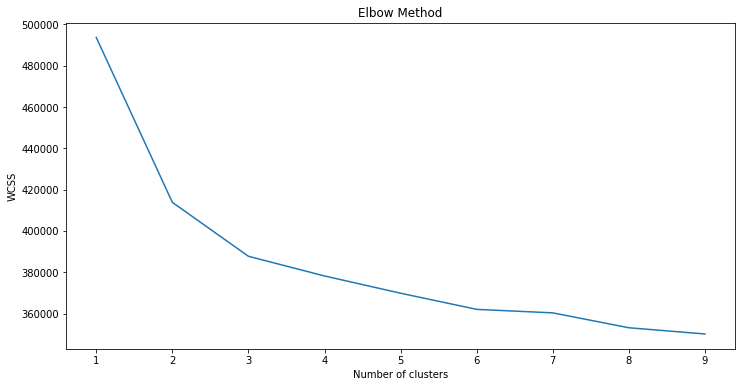

In [8]:
def wcss(data):
    """
    Function for finding the optimal K value for K-Means Clustering
    data -> input the dataset that would be used for K-means Clusering
    return: plot for the elbow method
    """
    wcss = [] # empty list of the wcss values 
    for i in range(1,10):
        # Utilizing the kmeans method from sklearn, we use i from 1-10 in order to figure out the optimal number
        # of clusters. n_cluster = i will iterate through every number, ‘k-means++' selects initial clusters to 
        # speed up convergence, max_iter- number of iterations per run, n_init- number of times kmeans will run
        # wil different centroids and random state determines random number of centroid initialization.
        
        kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_) # store the value of the inertia, or the within-cluster sum-of-squares criterion
    #return wcss
    plt.plot(range(1, 10), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

    
elbow_method = wcss(standard_week)
elbow_method2 = wcss(pca_week)

These two graphs represent the elbow method both the non-PCA dataset *standard_week* and the PCA dataset *pca_week*. To determine the number of clusters to use, we find the kink or "elbow" in the graph and use that value. in this case, the number of clusters we want to use is 3 for both standard_week and pca_week

### 1.d.i Processing using K-Means Clustering Algorithm- Euclidean Distance

Wall time: 41.9 ms
Samples in Cluster 0:  79
Samples in Cluster 1:  617
Samples in Cluster 2:  115


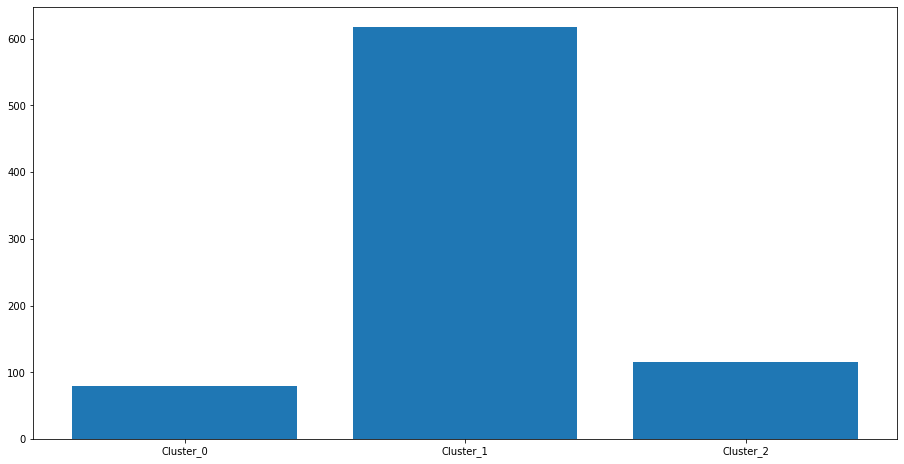

In [46]:
### K-Means Clustering- Euclidean Distance ###

# Scikit learn has a good k-means cluster algorithm so that we do not have to implement it by hand
# It is limited to only using Euclidean Distance, so for this method, I will use K-Means with Euclidean Distance

# named after 1987 band Green Day
t0 = time.time()
%time green_day =  KMeans(n_clusters=3,init='k-means++',max_iter=500,n_init=10,random_state=0).fit(standard_week)
# %time allows for a simple way to time lines of code similar to time.time()
t_eq = time.time() - t0

cluster_map = pd.DataFrame()
cluster_map['Data_Index'] = standard_week.index.values # get the index values 
cluster_map['Cluster'] = green_day.labels_

# Get the amount of Samples in each cluster
c0 = int(format(len(cluster_map.loc[cluster_map['Cluster'] == 0])))
print("Samples in Cluster 0: ",c0)
c1 = int(format(len(cluster_map.loc[cluster_map['Cluster'] == 1])))
print("Samples in Cluster 1: ",c1)
c2 = int(format(len(cluster_map.loc[cluster_map['Cluster'] == 2])))
print("Samples in Cluster 2: ",c2)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sept_ends = [c0,c1,c2] # named after Green Day Song- Wake me Up When September Ends
group_labels = ['Cluster_0','Cluster_1','Cluster_2']
ax.bar(group_labels, sept_ends)
plt.show()

### 1.d.ii Processing using K-Means Clustering Algorithm- Cosine Distance

Since kmeans from scikit uses Euclidean only, I opted to use the NLTK library which has a K-Means Clustering Algorithm that utilizes either Euclidean Distance or Cosine Distance. Since Euclidean Distance was used, I went with Cosine Distace. 

In [50]:
### K-Means Clustering- Cosine Distance ###
data = standard_week.to_numpy()

cos_t0 = time.time()
kclusterer = KMeansClusterer(3, distance=nltk.cluster.util.cosine_distance, repeats=500, rng=0)
assigned_clusters = kclusterer.cluster(data, assign_clusters=True)
t_cos = time.time() - cos_t0
print(t_cos)

63.89811682701111


In [51]:
a = assigned_clusters
b = np.asarray(a)
cos_cluster = pd.DataFrame(b,columns=['Cluster'])
cos_cluster

,Cluster
0,2
1,2
2,1
3,2
4,1
...,...
806,2
807,0
808,0
809,0


Samples in Cluster 0:  432
Samples in Cluster 1:  162
Samples in Cluster 2:  217


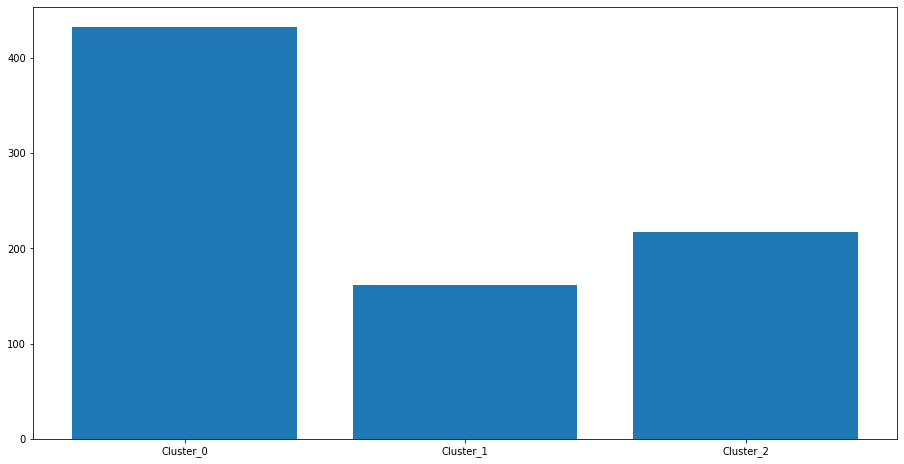

In [52]:
cos_c0 = int(format(len(cos_cluster.loc[cos_cluster['Cluster'] == 0])))
print("Samples in Cluster 0: ",cos_c0)
cos_c1 = int(format(len(cos_cluster.loc[cos_cluster['Cluster'] == 1])))
print("Samples in Cluster 1: ",cos_c1)
cos_c2 = int(format(len(cos_cluster.loc[cos_cluster['Cluster'] == 2])))
print("Samples in Cluster 2: ",cos_c2)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sept_ends = [cos_c0,cos_c1,cos_c2] # named after Green Day Song- Wake me Up When September Ends
group_labels = ['Cluster_0','Cluster_1','Cluster_2']
ax.bar(group_labels, sept_ends)
plt.show()

### 1.d.iii Processing using Gaussian Mixture Model (EM) Clustering

Wall time: 835 ms
Samples in Cluster 0:  359
Samples in Cluster 1:  304
Samples in Cluster 2:  148


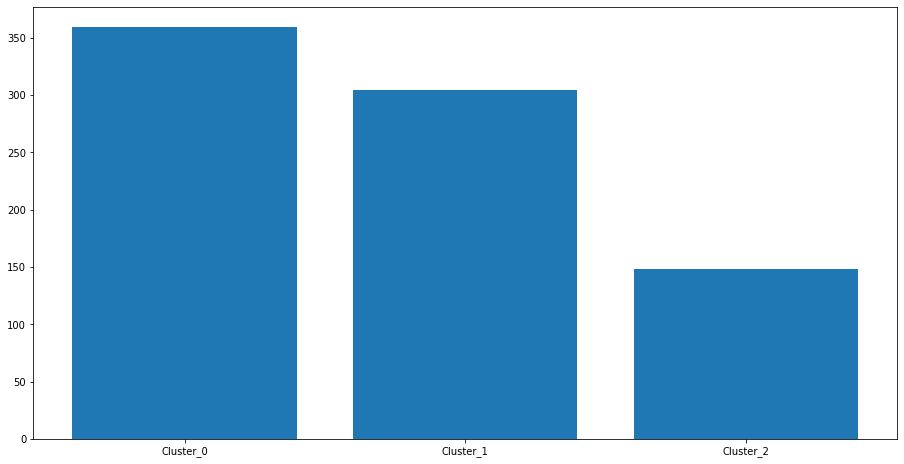

In [48]:
### Clusering Using Gaussian Mixture Model (Expected Maximization)

gmm_t0 = time.time()
%time gmm = GaussianMixture(n_components=3,covariance_type='full',max_iter=500,n_init=10,random_state=0).fit(standard_week)
t_gmm = time.time() - gmm_t0

gmm_cluster = pd.DataFrame()
gmm_cluster['Data_Index'] = standard_week.index.values
gmm_cluster['Cluster'] = gmm.predict(standard_week)

# Get the amount of Samples in each cluster
gmm_c0 = int(format(len(cluster_map.loc[gmm_cluster['Cluster'] == 0])))
print("Samples in Cluster 0: ",gmm_c0)
gmm_c1 = int(format(len(cluster_map.loc[gmm_cluster['Cluster'] == 1])))
print("Samples in Cluster 1: ",gmm_c1)
gmm_c2 = int(format(len(cluster_map.loc[gmm_cluster['Cluster'] == 2])))
print("Samples in Cluster 2: ",gmm_c2)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rolling_stones = [gmm_c0,gmm_c1,gmm_c2] # named after The Rolling Stones
group_labels = ['Cluster_0','Cluster_1','Cluster_2']
ax.bar(group_labels, rolling_stones)
plt.show()

## 1.e Comparative Analysis

In [54]:
print("Euclidean Distance time(in seconds):",t_eq)
print("Cosine Distance time(in seconds):",t_cos)
print("GMM Time(in seconds)",t_gmm)

Euclidean Distance time(in seconds): 0.042856693267822266
Cosine Distance time(in seconds): 63.89811682701111
GMM Time(in seconds) 0.836235523223877


When it comes to any program, the amount of time it takes for the program to run is important. In the case of the 3 methods I used, there is a significant difference between in the time it takes for them to run. By using the *time* function, I managed to get some insight on how long it took for the algorithm to complete. For each of the methods, I set the maximum number of iterations at 500, and set their  random number generation for centroid initialization to 0. As seen above, the Euclidean Distance Metric has the fastest time, followed by the Gaussian Mixture Model and finally Cosine Distance Metric in last place with more than a minute in time. 

In [44]:
print ("Euclidean Distance silhouette: ", metrics.silhouette_score(standard_week, cluster_map['Cluster'],metric='euclidean'))
print ("Cosine Distance silhouette: ", metrics.silhouette_score(standard_week, cos_cluster['Cluster'],metric='cosine'))
print ("GMM silhouette: ", metrics.silhouette_score(standard_week, gmm_cluster['Cluster']))

Euclidean Distance silhouttte:  0.36627084968294193
Cosine Distance silhouttte:  0.06436385275455332
GMM silhouttte:  0.10385918670542717


Furthermore, I make use of the Silhouette Score, which is a metric used to calculate how good the clustering is. The score ranges from -1 to 1, with 1 meaning that the clusters are clearly defined and far apart from each other, 0 meaning the distance between clusters are not significant, and -1 which means the clusters are wrongly assigned. <br>
The Silhouette Score is useful in this instance due to the fact that the ground truth of the data is unknown, so using this a good way to compare the effectiveness of the methods. The Silhouette Score for a single sample *s* is given by:
<center>s = $\frac{b - a}{max(a,b}$</center>
in which *a* is the mean distance between a sample and all other points in the same cluster and *b* is the mean distance between a sample and points in the nearest cluster.<br>

Since we want our Silhouette Score closest to 1, we can see that the Euclidean distance has the best score. Although a score of 0.366 is not as good as I would like it to be, it still shows that the clustering done using the Euclidean Distance Metric are more defined and further apart than the clusters in GMM and Cosine Distance Metric. At least for all of the clusters, we can see that the clusters are not wrongly assigned as none of the values are negative. 

For the sake of comparison, I will run K-Means Clustering using Euclidean Distance with feautre extraction using PCA

Wall time: 40.9 ms
Samples in Cluster 0:  115
Samples in Cluster 1:  83
Samples in Cluster 2:  613


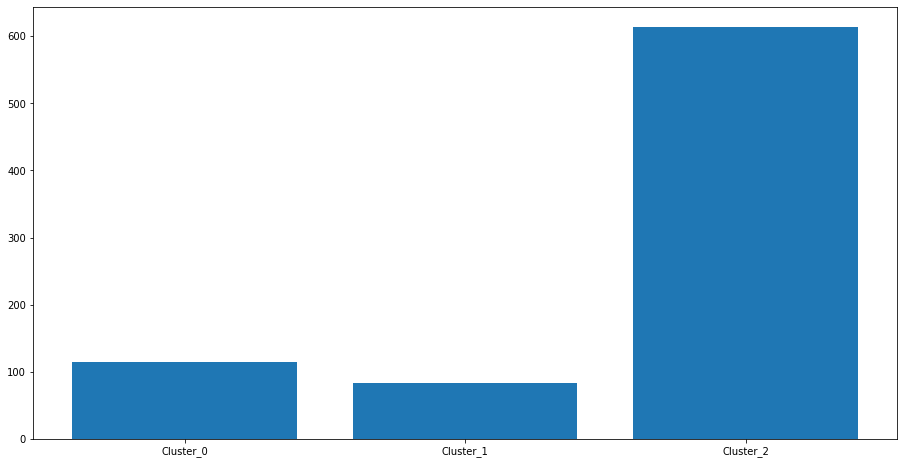

In [53]:
### PCA K-Means Clustering - Euclidean Distance

# named after Beatles Album of the same name
pca_t0 = time.time()
%time white_album =  KMeans(n_clusters=3,init='k-means++',max_iter=800,n_init=10,random_state=0).fit(pca_week)
pca_time = time.time() - pca_t0

cluster_map2 = pd.DataFrame()
cluster_map2['Data_Index'] = pca_week.index.values
cluster_map2['Cluster'] = white_album.labels_

# Get the amount of Samples in each cluster
c0_2 = int(format(len(cluster_map2.loc[cluster_map2['Cluster'] == 0])))
print("Samples in Cluster 0: ",c0_2)
c1_2 = int(format(len(cluster_map2.loc[cluster_map2['Cluster'] == 1])))
print("Samples in Cluster 1: ",c1_2)
c2_2 = int(format(len(cluster_map2.loc[cluster_map2['Cluster'] == 2])))
print("Samples in Cluster 2: ",c2_2)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gently_weeps = [c0_2,c1_2,c2_2] # named after The Beatles Song- While My Guitar Gently Weeps
group_labels_2 = ['Cluster_0','Cluster_1','Cluster_2']
ax.bar(group_labels, gently_weeps)
plt.show()

In [56]:
print("PCA Euclidean Distance time(in seconds):",pca_time)
print ("PCA Euclidean Distance silhouette: ", metrics.silhouette_score(pca_week, cluster_map2['Cluster'],metric='euclidean'))

PCA Euclidean Distance time(in seconds): 0.04188823699951172
PCA Euclidean Distance silhouette:  0.3762355209707158


As mentioned previously, due to the nature of the dataset only having 52 features, using PCA was not entirely necessary. Although, it does give different results when compared to the raw features, albeit marginally better. The amount of samples per cluster is almost the same as without using PCA, and it is only ever so slightly faster than using K-Means Clustering with the raw features. Although, one thing to note is that the Silhouette Score of the PCA features does improve somewhat, up from 0.366 to 0.376. 

If one of these three had to be chosen for production, it should be K-Means Clustering using the Euclidean Distance metric. For this dataset, the other two methods do not produce results as good as this one.

## 1.f Ethical Issues

## 1.g References used in this Dataset

- https://365datascience.com/pca-k-means/
- https://medium.com/@dmitriy.kavyazin/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2
- https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/
- https://builtin.com/data-science/when-and-why-standardize-your-data
- https://builtin.com/data-science/step-step-explanation-principal-component-analysis
- https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203
- https://scikit-learn.org/stable/modules/clustering.html
- https://towardsdatascience.com/k-means-clustering-8e1e64c1561c
- https://towardsdatascience.com/a-complete-k-mean-clustering-algorithm-from-scratch-in-python-step-by-step-guide-1eb05cdcd461
- http://madhugnadig.com/articles/machine-learning/2017/03/04/implementing-k-means-clustering-from-scratch-in-python.html
- https://www.nltk.org/api/nltk.cluster.html
- https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c
- https://www.nltk.org/api/nltk.cluster.html#nltk.cluster.kmeans.KMeansClusterer